# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [1]:
%pwd

'/Users/sfdcapacmarketing/Documents/DataScience Copy/Cloned Repository/DAT8SYD/labs/Week 3 Lesson 1 - Logistic Regression'

In [10]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
# titanic = pd.read_csv('/Users/sfdcapacmarketing/Documents/DataScience Copy/Cloned Repository/DAT8SYD/data/titanic.csv', index_col='PassengerId')
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
titanic.head()
# gp - some nice shorthand in the directory.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived
# GP - subsetting the data prior to prediction.

In [7]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# GP - test data - estimate how something will respond to real world data
# GP2 - RANDOM SEEDS - random_state=1 is a feature of Python and random numbers - have to pick the starting point; this code can be replicated elsewhere due to specifying this as 1
# GP3 - train test split will run a 70:30 split.

In [13]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
# GP - NB Statsmodel is a better package for linear regression than Skikit learn, but has less flexibility.

In [16]:
# TASK 5: make predictions on testing set and calculate accuracy
# GP - predicting Y survival based on X_test and computing accuracy.
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
# GP - result will be how often it got it right. Sum of false +ve and false -ve

0.668161434978


In [17]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
# zip command saves the model object. 
# Accuracy on the test set is key. 
# Split randomization can create bias - which is why we repeat this a few times to average out - basis of cross validation.

0.686098654709


In [18]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))
'''
Interpreting the matrix:
112 is predicting that they'd survive and they did surive (true pos)
41 is predicting that they wouldn't wouldn't survive and they didn't survive (true neg)
54 is the problem number - predicting that they'd survive, and they perished (false pos)
So weighting of error is on false positives. 
'''

[[112  16]
 [ 54  41]]


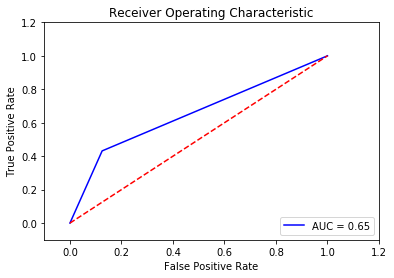

In [21]:
# TASK 8: Generate the ROC Curve
# metrics.roc_curve(y_test,y_pred_class)
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt
# Generate the parameters we will plot
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,y_pred_class)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate) #AUC is area under curve
# Plot fpr vs tpr and AUC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Courtesy of these instructions - https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

In [30]:
# TASK 9: What variables should we include in the model to improve it?
'''
You don't want to learn the dataset. Overfitting is a real drama.
Benchmark is ROC AUC of 0.65, 54 false positives, 69% accuracy
Approach - get gender into the model "Is Woman". Will need a dictionary to map.
'''

# defining gender dictionary
dg = {'male': 0,'female':1}
titanic['Is_woman'] = titanic['Sex'].map(dg)
titanic.head()

# Check out zip and dicts from tuples. 

# titanic.Age.fillna(titanic.Age.mean(), inplace=True)
# feature_cols = ['Pclass', 'Parch', 'Age']
# X = titanic[feature_cols]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# logreg.fit(X_train, y_train)
# zip(feature_cols, logreg.coef_[0])
# y_pred_class = logreg.predict(X_test)
# print(metrics.accuracy_score(y_test, y_pred_class))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_woman
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Test and obtain ROC AUC, confusion matrix, and accuracy for model with gender.


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV 
d = [
    {'Sex':'male'},
    {'Sex':'female'}
]
df = pd.DataFrame(d)
print(df)
vx = DV(sparse=False)


# COULD INVOLVE A DICTIONARY!!! Difficulty with floats and strings...

# OneHotEncoder(categorical_features='all', dtype=<... 'numpy.float64'>,
#        handle_unknown='error', n_values='auto', sparse=True)
# enc.n_values_
# array([2, 3, 4])
# enc.feature_indices_
# array([0, 2, 5, 9])
# enc.transform([[0, 1, 1]]).toarray()
# array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.]])

# LABEL ENCODER

      Sex
0    male
1  female


In [ ]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours

# A long exercise...